<a href="https://colab.research.google.com/github/AugustoRC/AnalisePreditiva/blob/master/PI5_V8_Logist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O grupo é composto por:
Augusto Camblor
Sofia Iara
Beatriz Fernandes

#Inicio do código

In [ ]:
!pip install pandas openpyxl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import io
import os
import pymc as pm
import numpy as np
import arviz as az
import pandas as pd
import seaborn as sns
import pytensor.tensor as at
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Buscar a previsão de quanto tempo de uso uma maquina vai acabar quebrando para entender qual a média do tempo necessario para a manutenção preventiva

### Importação dados Costa Brasil

In [ ]:
filedirectory = '/content/drive/MyDrive/Sexto semestre/Manutenção 2024_Costa Brasil.xlsm'

In [ ]:
df = pd.read_excel(filedirectory, engine='openpyxl', header=1)
df = df.iloc[:, 1:]
df

,CÓD,ÍNDICE,DIA,DATA,PLACA,MODELO,FILIAL,DATA DE ENTRADA,DATA DE SAÍDA,TIPO,DESCRIÇÃO DO PROBLEMA,SERVIÇO REALIZADO,STATUS,SERVIÇO,MÊS,GRUPO,HORAS POR DIA
0,45445EPP.0014EMPILHADEIRA,1.0,2jun1,2024-06-02,EPP.0014,TEREX TFC 45,JAVARI 1,2024-06-02 08:00:00,2024-06-02 13:33:00,Preventiva,Revisão Preventiva,NaN,Liberado,Mecânica,jun,EMPILHADEIRA,0 days 05:33:00
1,45446EPP.0014EMPILHADEIRA,1.0,3jun1,2024-06-03,EPP.0014,TEREX TFC 45,JAVARI 1,2024-06-03 13:11:00,2024-06-03 14:20:00,Corretiva,Fusivel,NaN,Liberado,Elétrica,jun,EMPILHADEIRA,0 days 01:09:00
2,45448EPP.0014EMPILHADEIRA,1.0,5jun1,2024-06-05,EPP.0014,TEREX TFC 45,JAVARI 1,2024-06-05 07:50:00,2024-06-05 14:32:00,Corretiva,Troca Da Junta /Transmissão E Limpeza Dos Sens...,NaN,Liberado,Mecânica,jun,EMPILHADEIRA,0 days 06:42:00
3,45448EPP.0026EMPILHADEIRA,2.0,5jun2,2024-06-05,EPP.0026,HYSTER 120FT,JAVARI 2,2024-06-05 14:14:00,2024-06-05 17:02:00,Corretiva,Troca Do Bendix,NaN,Liberado,Elétrica,jun,EMPILHADEIRA,0 days 02:48:00
4,45449EPP.0026EMPILHADEIRA,1.0,6jun1,2024-06-06,EPP.0026,HYSTER 120FT,JAVARI 2,2024-06-06 09:29:00,2024-06-13 13:12:00,Corretiva,Substituição Dos Rolamentos,Serviço de usinagem dos rolamentos / regulariz...,Liberado,Mecânica,jun,EMPILHADEIRA,7 days 03:43:00
5,45450EPP.0007EMPILHADEIRA,1.0,7jun1,2024-06-07,EPP.0007,HYSTER - H 80 J,JAVARI 1,2024-06-07 09:44:00,2024-06-07 11:28:00,Corretiva,Sem Funcionamento,Transferencia De Carga,Liberado,Elétrica,jun,EMPILHADEIRA,0 days 01:44:00
6,45450EPP.0008EMPILHADEIRA,2.0,7jun2,2024-06-07,EPP.0008,HYSTER - H 80 J,JAVARI 1,2024-06-07 09:46:00,2024-06-07 11:28:00,Corretiva,Vazamento De Óleo E Agua,Reaperto Na Abraçadeira,Liberado,Mecânica,jun,EMPILHADEIRA,0 days 01:42:00
7,45450EPP.0026EMPILHADEIRA,3.0,7jun3,2024-06-07,EPP.0026,HYSTER 120FT,JAVARI 2,2024-06-06 09:29:00,2024-06-13 13:12:00,Corretiva,Substituição Dos Rolamentos,NaN,Liberado,Mecânica,jun,EMPILHADEIRA,6 days 13:12:00
8,45451EPP.0007EMPILHADEIRA,1.0,8jun1,2024-06-08,EPP.0007,HYSTER - H 80 J,JAVARI 1,2024-06-08 13:07:00,NaT,Corretiva,Motor De Partida,Motor De Partida,Em Andamento,Elétrica,jun,EMPILHADEIRA,0 days 10:53:00
9,45451EPP.0026EMPILHADEIRA,2.0,8jun2,2024-06-08,EPP.0026,HYSTER 120FT,JAVARI 2,2024-06-06 09:29:00,2024-06-08 12:34:00,Corretiva,Substituição Dos Rolamentos,NaN,Liberado,Mecânica,jun,EMPILHADEIRA,0 days 12:34:00


In [ ]:
df_copy = df.copy()

In [ ]:
df_copy['DATA DE ENTRADA CONVERTIDA'] = pd.to_datetime(df_copy['DATA DE ENTRADA'])
df_copy['DATA DE ENTRADA CONVERTIDA'] = df_copy['DATA DE ENTRADA CONVERTIDA'].astype(int) // 10**9
df_copy

,CÓD,ÍNDICE,DIA,DATA,PLACA,MODELO,FILIAL,DATA DE ENTRADA,DATA DE SAÍDA,TIPO,DESCRIÇÃO DO PROBLEMA,SERVIÇO REALIZADO,STATUS,SERVIÇO,MÊS,GRUPO,HORAS POR DIA,DATA DE ENTRADA CONVERTIDA
0,45445EPP.0014EMPILHADEIRA,1.0,2jun1,2024-06-02,EPP.0014,TEREX TFC 45,JAVARI 1,2024-06-02 08:00:00,2024-06-02 13:33:00,Preventiva,Revisão Preventiva,NaN,Liberado,Mecânica,jun,EMPILHADEIRA,0 days 05:33:00,1717315200
1,45446EPP.0014EMPILHADEIRA,1.0,3jun1,2024-06-03,EPP.0014,TEREX TFC 45,JAVARI 1,2024-06-03 13:11:00,2024-06-03 14:20:00,Corretiva,Fusivel,NaN,Liberado,Elétrica,jun,EMPILHADEIRA,0 days 01:09:00,1717420260
2,45448EPP.0014EMPILHADEIRA,1.0,5jun1,2024-06-05,EPP.0014,TEREX TFC 45,JAVARI 1,2024-06-05 07:50:00,2024-06-05 14:32:00,Corretiva,Troca Da Junta /Transmissão E Limpeza Dos Sens...,NaN,Liberado,Mecânica,jun,EMPILHADEIRA,0 days 06:42:00,1717573800
3,45448EPP.0026EMPILHADEIRA,2.0,5jun2,2024-06-05,EPP.0026,HYSTER 120FT,JAVARI 2,2024-06-05 14:14:00,2024-06-05 17:02:00,Corretiva,Troca Do Bendix,NaN,Liberado,Elétrica,jun,EMPILHADEIRA,0 days 02:48:00,1717596840
4,45449EPP.0026EMPILHADEIRA,1.0,6jun1,2024-06-06,EPP.0026,HYSTER 120FT,JAVARI 2,2024-06-06 09:29:00,2024-06-13 13:12:00,Corretiva,Substituição Dos Rolamentos,Serviço de usinagem dos rolamentos / regulariz...,Liberado,Mecânica,jun,EMPILHADEIRA,7 days 03:43:00,1717666140
5,45450EPP.0007EMPILHADEIRA,1.0,7jun1,2024-06-07,EPP.0007,HYSTER - H 80 J,JAVARI 1,2024-06-07 09:44:00,2024-06-07 11:28:00,Corretiva,Sem Funcionamento,Transferencia De Carga,Liberado,Elétrica,jun,EMPILHADEIRA,0 days 01:44:00,1717753440
6,45450EPP.0008EMPILHADEIRA,2.0,7jun2,2024-06-07,EPP.0008,HYSTER - H 80 J,JAVARI 1,2024-06-07 09:46:00,2024-06-07 11:28:00,Corretiva,Vazamento De Óleo E Agua,Reaperto Na Abraçadeira,Liberado,Mecânica,jun,EMPILHADEIRA,0 days 01:42:00,1717753560
7,45450EPP.0026EMPILHADEIRA,3.0,7jun3,2024-06-07,EPP.0026,HYSTER 120FT,JAVARI 2,2024-06-06 09:29:00,2024-06-13 13:12:00,Corretiva,Substituição Dos Rolamentos,NaN,Liberado,Mecânica,jun,EMPILHADEIRA,6 days 13:12:00,1717666140
8,45451EPP.0007EMPILHADEIRA,1.0,8jun1,2024-06-08,EPP.0007,HYSTER - H 80 J,JAVARI 1,2024-06-08 13:07:00,NaT,Corretiva,Motor De Partida,Motor De Partida,Em Andamento,Elétrica,jun,EMPILHADEIRA,0 days 10:53:00,1717852020
9,45451EPP.0026EMPILHADEIRA,2.0,8jun2,2024-06-08,EPP.0026,HYSTER 120FT,JAVARI 2,2024-06-06 09:29:00,2024-06-08 12:34:00,Corretiva,Substituição Dos Rolamentos,NaN,Liberado,Mecânica,jun,EMPILHADEIRA,0 days 12:34:00,1717666140


### Importação dos dados da ANTAC

### Tratamentos e converções

In [ ]:
anos = [2019, 2020, 2021, 2022, 2023, 2024]

df_Atracao = {}
df_TemposAtracao = {}
df_TempoAtracaoParalisacao = {}
df_filter_TAP = {}
df_teste_concat = {}
df_teste_concat2 = {}
df_teste_concat3 = {}
df_join = {}

for ano in anos:
    df_Atracao[ano] = pd.read_csv(f'/content/drive/MyDrive/Sexto semestre/PI5_Dados/PI5_Dados/{ano}Atracacao.txt', sep=';', header=0)
    df_TemposAtracao[ano] = pd.read_csv(f'/content/drive/MyDrive/Sexto semestre/PI5_Dados/PI5_Dados/{ano}TemposAtracacao.txt', sep=';', header=0)
    df_TempoAtracaoParalisacao[ano] = pd.read_csv(f'/content/drive/MyDrive/Sexto semestre/PI5_Dados/PI5_Dados/{ano}TemposAtracacaoParalisacao.txt', sep=';', header=0)

    df_filter_TAP[ano] = df_TempoAtracaoParalisacao[ano].copy()
    df_filter_TAP[ano] = df_filter_TAP[ano][df_filter_TAP[ano]['DescricaoTempoDesconto'].isin([
        'Manutenção preventiva',
        'Quebra de equipamento do Porto, devidamente comprovada',
        'Quebra de equipamento do Operador Portuário, devidamente comprovada'
    ])]

    df_teste_concat[ano] = df_filter_TAP[ano].copy()
    df_teste_concat2[ano] = df_TemposAtracao[ano].set_index('IDAtracacao')
    df_teste_concat3[ano] = df_Atracao[ano].set_index('IDAtracacao')

    df_join[ano] = df_teste_concat[ano].set_index('IDAtracacao')
    df_join[ano] = df_join[ano].join(df_teste_concat2[ano], how='inner', rsuffix='_right').join(df_teste_concat3[ano], how='inner', rsuffix='_right2')

    df_join[ano].reset_index(inplace=True)

    condicao = df_join[ano]['DescricaoTempoDesconto'].isin([
        'Manutenção preventiva',
        'Quebra de equipamento do Porto, devidamente comprovada',
        'Quebra de equipamento do Operador Portuário, devidamente comprovada'
    ])

    df_join[ano] = pd.concat([df_join[ano][condicao].drop_duplicates(subset='IDAtracacao', keep='first'), df_join[ano][~condicao]])

    df_join[ano].drop_duplicates(subset='IDAtracacao', keep='first', inplace=True)

    df_join_all_years = pd.concat(list(df_join.values()), ignore_index=True)

df_join_all_years

,IDAtracacao,IDTemposDescontos,DescricaoTempoDesconto,DTInicio,DTTermino,TEsperaAtracacao,TEsperaInicioOp,TOperacao,TEsperaDesatracacao,TAtracado,...,Tipo de Navegação da Atracação,Nacionalidade do Armador,FlagMCOperacaoAtracacao,Terminal,Município,UF,SGUF,Região Geográfica,Nº da Capitania,Nº do IMO
0,973456,420152,"Quebra de equipamento do Porto, devidamente co...",16/01/2019 09:00:00,16/01/2019 09:10:00,"549,21666666667","1,2333333333372","69,466666666791","2,3999999999651","73,100000000093",...,Longo Curso,2.0,1,CAIS PÚBLICO,Paranaguá,Paraná,PR,Sul,NaN,9320312.0
1,973457,420194,"Quebra de equipamento do Porto, devidamente co...",30/12/2018 08:10:00,30/12/2018 09:00:00,"162,50000000006","1,9166666666279","136,58333333326","3,9166666666861","142,41666666657",...,Longo Curso,2.0,1,CAIS PÚBLICO,Paranaguá,Paraná,PR,Sul,NaN,9486465.0
2,978400,428761,"Quebra de equipamento do Operador Portuário, d...",29/01/2019 07:15:00,29/01/2019 07:40:00,"33,233333333221","1,0000000001164","49,166666666628","2,8333333333139","53,000000000058",...,Longo Curso,2.0,1,Corredor de Exportação Leste,Paranaguá,Paraná,PR,Sul,NaN,9544085.0
3,973592,421376,"Quebra de equipamento do Operador Portuário, d...",02/01/2019 23:50:00,03/01/2019 01:00:00,"34,41666666657","1,8333333333721","162,33333333337","2,1666666665697","166,33333333331",...,Longo Curso,2.0,1,Porto Ponta do Félix,Antonina,Paraná,PR,Sul,NaN,9728150.0
4,973885,423498,"Quebra de equipamento do Operador Portuário, d...",29/12/2018 11:42:00,29/12/2018 13:00:00,"420,36666666681","3,1333333332441",Valor Discrepante,"1,8333333333721",Valor Discrepante,...,Longo Curso,2.0,1,PIER DA FOSPAR,Paranaguá,Paraná,PR,Sul,NaN,9580508.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10604,1469481,1132493,"Quebra de equipamento do Operador Portuário, d...",22/06/2024 07:45:00,22/06/2024 07:46:00,"6,9833333332208","1,2833333333256","36,866666666698","2,9500000000116","41,100000000035",...,Cabotagem,2.0,1,Multi-Rio,Rio de Janeiro,Rio de Janeiro,RJ,Sudeste,281E002029,9327669.0
10605,1469482,1132785,"Quebra de equipamento do Operador Portuário, d...",24/06/2024 03:43:00,24/06/2024 03:51:00,"3,9499999999534","1,1500000000815","7,449999999837","4,9833333335118","13,58333333343",...,Longo Curso,2.0,1,Multi-Rio,Rio de Janeiro,Rio de Janeiro,RJ,Sudeste,NaN,9706190.0
10606,1469484,1132792,"Quebra de equipamento do Operador Portuário, d...",21/06/2024 19:58:00,21/06/2024 20:13:00,"9,9166666666861","2,1333333333023","7,4833333334536","0,49999999988358","10,11666666664",...,Cabotagem,2.0,1,Multi-Rio,Rio de Janeiro,Rio de Janeiro,RJ,Sudeste,NaN,9351799.0
10607,1470841,1133751,"Quebra de equipamento do Operador Portuário, d...",20/06/2024 00:06:00,20/06/2024 00:16:00,"27,333333333372","2,4166666666861","23,683333333349","1,7333333332208","27,833333333256",...,Cabotagem,2.0,1,Multi-Rio,Rio de Janeiro,Rio de Janeiro,RJ,Sudeste,NaN,9961960.0


In [ ]:
condicao = df_join_all_years['DescricaoTempoDesconto'].isin([
    'Manutenção preventiva',
    'Quebra de equipamento do Porto, devidamente comprovada',
    'Quebra de equipamento do Operador Portuário, devidamente comprovada'
])

mapeamento = {
    'Manutenção preventiva': 0,
    'Quebra de equipamento do Porto, devidamente comprovada': 1,
    'Quebra de equipamento do Operador Portuário, devidamente comprovada': 2
}

df_join_all_years.loc[condicao, 'DescricaoTempoDesconto'] = df_join_all_years.loc[condicao, 'DescricaoTempoDesconto'].replace(mapeamento)
df_join_all_years

<ipython-input-9-44eda69381b1>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_join_all_years.loc[condicao, 'DescricaoTempoDesconto'] = df_join_all_years.loc[condicao, 'DescricaoTempoDesconto'].replace(mapeamento)


,IDAtracacao,IDTemposDescontos,DescricaoTempoDesconto,DTInicio,DTTermino,TEsperaAtracacao,TEsperaInicioOp,TOperacao,TEsperaDesatracacao,TAtracado,...,Tipo de Navegação da Atracação,Nacionalidade do Armador,FlagMCOperacaoAtracacao,Terminal,Município,UF,SGUF,Região Geográfica,Nº da Capitania,Nº do IMO
0,973456,420152,1,16/01/2019 09:00:00,16/01/2019 09:10:00,"549,21666666667","1,2333333333372","69,466666666791","2,3999999999651","73,100000000093",...,Longo Curso,2.0,1,CAIS PÚBLICO,Paranaguá,Paraná,PR,Sul,NaN,9320312.0
1,973457,420194,1,30/12/2018 08:10:00,30/12/2018 09:00:00,"162,50000000006","1,9166666666279","136,58333333326","3,9166666666861","142,41666666657",...,Longo Curso,2.0,1,CAIS PÚBLICO,Paranaguá,Paraná,PR,Sul,NaN,9486465.0
2,978400,428761,2,29/01/2019 07:15:00,29/01/2019 07:40:00,"33,233333333221","1,0000000001164","49,166666666628","2,8333333333139","53,000000000058",...,Longo Curso,2.0,1,Corredor de Exportação Leste,Paranaguá,Paraná,PR,Sul,NaN,9544085.0
3,973592,421376,2,02/01/2019 23:50:00,03/01/2019 01:00:00,"34,41666666657","1,8333333333721","162,33333333337","2,1666666665697","166,33333333331",...,Longo Curso,2.0,1,Porto Ponta do Félix,Antonina,Paraná,PR,Sul,NaN,9728150.0
4,973885,423498,2,29/12/2018 11:42:00,29/12/2018 13:00:00,"420,36666666681","3,1333333332441",Valor Discrepante,"1,8333333333721",Valor Discrepante,...,Longo Curso,2.0,1,PIER DA FOSPAR,Paranaguá,Paraná,PR,Sul,NaN,9580508.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10604,1469481,1132493,2,22/06/2024 07:45:00,22/06/2024 07:46:00,"6,9833333332208","1,2833333333256","36,866666666698","2,9500000000116","41,100000000035",...,Cabotagem,2.0,1,Multi-Rio,Rio de Janeiro,Rio de Janeiro,RJ,Sudeste,281E002029,9327669.0
10605,1469482,1132785,2,24/06/2024 03:43:00,24/06/2024 03:51:00,"3,9499999999534","1,1500000000815","7,449999999837","4,9833333335118","13,58333333343",...,Longo Curso,2.0,1,Multi-Rio,Rio de Janeiro,Rio de Janeiro,RJ,Sudeste,NaN,9706190.0
10606,1469484,1132792,2,21/06/2024 19:58:00,21/06/2024 20:13:00,"9,9166666666861","2,1333333333023","7,4833333334536","0,49999999988358","10,11666666664",...,Cabotagem,2.0,1,Multi-Rio,Rio de Janeiro,Rio de Janeiro,RJ,Sudeste,NaN,9351799.0
10607,1470841,1133751,2,20/06/2024 00:06:00,20/06/2024 00:16:00,"27,333333333372","2,4166666666861","23,683333333349","1,7333333332208","27,833333333256",...,Cabotagem,2.0,1,Multi-Rio,Rio de Janeiro,Rio de Janeiro,RJ,Sudeste,NaN,9961960.0


In [ ]:
columns = [
    'DescricaoTempoDesconto',
    'TAtracado', 'Data Atracação', 'Data Chegada',
    'Data Desatracação'
]

features = [
    'TAtracado', 'Data Atracação', 'Data Chegada',
    'Data Desatracação'
]

target = 'DescricaoTempoDesconto'

convert_dates = [
    'Data Atracação', 'Data Chegada',
    'Data Desatracação',
]

columns_to_change_String = [
    'TAtracado'
]

change_strings = {
    'Valor Discrepante': 0,
    'Zero': 0
}

convert_to_float = [
    'TAtracado',
]

### Tratamentos e converções

In [ ]:
def normalize_dates(df, date_columns):
    for col in date_columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        days = (df[col] - df[col].min()).dt.days
        df[col] = (days - days.min()) / (days.max() - days.min())
    return df

df_join_all_years = normalize_dates(df_join_all_years, convert_dates)

for col in columns_to_change_String:
    df_join_all_years[col] = df_join_all_years[col].replace(change_strings)

for col in convert_to_float:
    df_join_all_years[col] = df_join_all_years[col].apply(lambda v: str(v).replace(',', '.')).apply(lambda v: float(v))

df_join_all_years = df_join_all_years[columns]
df_join_all_years

<ipython-input-11-aac23e9b314b>:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
<ipython-input-11-aac23e9b314b>:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
<ipython-input-11-aac23e9b314b>:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')


,DescricaoTempoDesconto,TAtracado,Data Atracação,Data Chegada,Data Desatracação
0,1,73.100000,0.157650,0.147992,0.007976
1,1,142.416667,0.150042,0.147146,0.000499
2,2,53.000000,0.162722,0.162368,0.013460
3,2,166.333333,0.152156,0.151797,0.003490
4,2,0.000000,0.150465,0.143340,0.002991
...,...,...,...,...,...
10604,2,41.100000,0.996619,0.996617,0.996510
10605,2,13.583333,0.997041,0.997463,0.997009
10606,2,10.116667,0.996196,0.996617,0.996012
10607,2,27.833333,0.995351,0.995349,0.995015


In [ ]:
# Separando os DataFrames com base nos valores da coluna `DescricaoTempoDesconto`
df_manutencao = df_join_all_years[df_join_all_years['DescricaoTempoDesconto'] == 0]
df_quebra = df_join_all_years[df_join_all_years['DescricaoTempoDesconto'] == 1]

# Selecionando apenas as colunas numéricas para calcular as centroides
numeric_columns = df_manutencao.select_dtypes(include=['float64', 'int']).columns

# Calculando as centroides para cada grupo
centroid_manutencao = df_manutencao[numeric_columns].mean()
centroid_quebra = df_quebra[numeric_columns].mean()

# Exibindo as centroides de cada grupo
print("Centroide dos valores para Manutenção Preventiva:")
print(centroid_manutencao)

print("\nCentroide dos valores para Quebra de Equipamento:")
print(centroid_quebra)


Centroide dos valores para Manutenção Preventiva:
TAtracado            66.476766
Data Atracação        0.567495
Data Chegada          0.565637
Data Desatracação     0.491600
dtype: float64

Centroide dos valores para Quebra de Equipamento:
TAtracado            69.383638
Data Atracação        0.559760
Data Chegada          0.554778
Data Desatracação     0.482335
dtype: float64


###Adicionando o Cluster

In [ ]:
# Definindo o número de clusters
n_clusters = 3

# Função para agrupar e calcular uma única centroide por cluster
def cluster_and_calculate_single_centroid(df, n_clusters):
    # Seleciona todas as colunas numéricas e remove valores NaN
    numeric_columns = df.select_dtypes(include=['float64', 'int']).columns
    df_numeric = df[numeric_columns].dropna()

    # Normaliza os dados
    scaler = StandardScaler()
    df_normalized = scaler.fit_transform(df_numeric)

    # Aplica o K-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = kmeans.fit_predict(df_normalized)
    df['Cluster'] = clusters  # Adiciona o cluster como uma coluna no DataFrame original

    # Calcula a média de todas as colunas dentro de cada cluster para obter uma única centroide
    centroids = {}
    for cluster_id in range(n_clusters):
        cluster_points = df_normalized[clusters == cluster_id]
        # Calcula a média global para cada cluster (uma centroide única)
        centroids[cluster_id] = cluster_points.mean(axis=0).mean()

    return centroids

# Aplicando a função para o grupo "Manutenção preventiva"
centroids_manutencao = cluster_and_calculate_single_centroid(df_manutencao, n_clusters)
print("Centroide única para cada cluster de Manutenção Preventiva:")
print(centroids_manutencao)

# Aplicando a função para o grupo "Quebra de Equipamento"
centroids_quebra = cluster_and_calculate_single_centroid(df_quebra, n_clusters)
print("\nCentroide única para cada cluster de Quebra de Equipamento:")
print(centroids_quebra)


Centroide única para cada cluster de Manutenção Preventiva:
{0: 0.564691082071262, 1: -0.7839034641888445, 2: 0.7945168323956093}

Centroide única para cada cluster de Quebra de Equipamento:
{0: 1.0227308701972642, 1: 0.4546920062931932, 2: -0.6614317438740931}


<ipython-input-13-1ff8f9d5c15a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = clusters  # Adiciona o cluster como uma coluna no DataFrame original
<ipython-input-13-1ff8f9d5c15a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = clusters  # Adiciona o cluster como uma coluna no DataFrame original


In [ ]:
# Seleciona as colunas de interesse para o agrupamento
features = [
    'TAtracado', 'Data Atracação', 'Data Chegada',
    'Data Desatracação'
]

# Extrai apenas as colunas para agrupamento e o alvo para validação
df_cluster = df_join_all_years[features + ['DescricaoTempoDesconto']].dropna()

# Normaliza as features para o KMeans
scaler = StandardScaler()
df_cluster[features] = scaler.fit_transform(df_cluster[features])

# Definir e ajustar o modelo KMeans com 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster[features])

# Comparação entre agrupamento KMeans e a coluna de manutenção (0 ou 1)
df_cluster['DescricaoTempoDesconto'] = df_cluster['DescricaoTempoDesconto'].astype(int)

# Exibe uma tabela de contagem para comparar clusters e a coluna de manutenção
print(pd.crosstab(df_cluster['Cluster'], df_cluster['DescricaoTempoDesconto'], rownames=['Cluster'], colnames=['DescricaoTempoDesconto']))

# Análise do agrupamento
df_cluster.head()


DescricaoTempoDesconto    0     1     2
Cluster                                
0                       583  1579  3027
1                       521  1268  3631


,TAtracado,Data Atracação,Data Chegada,Data Desatracação,DescricaoTempoDesconto,Cluster
0,0.089552,-1.732645,-1.763634,-1.732729,1,0
1,1.417478,-1.762957,-1.767017,-1.757987,1,0
2,-0.295511,-1.712437,-1.706117,-1.714207,2,0
3,1.875658,-1.754537,-1.748409,-1.747884,2,0
4,-1.310853,-1.761273,-1.782242,-1.749567,2,0


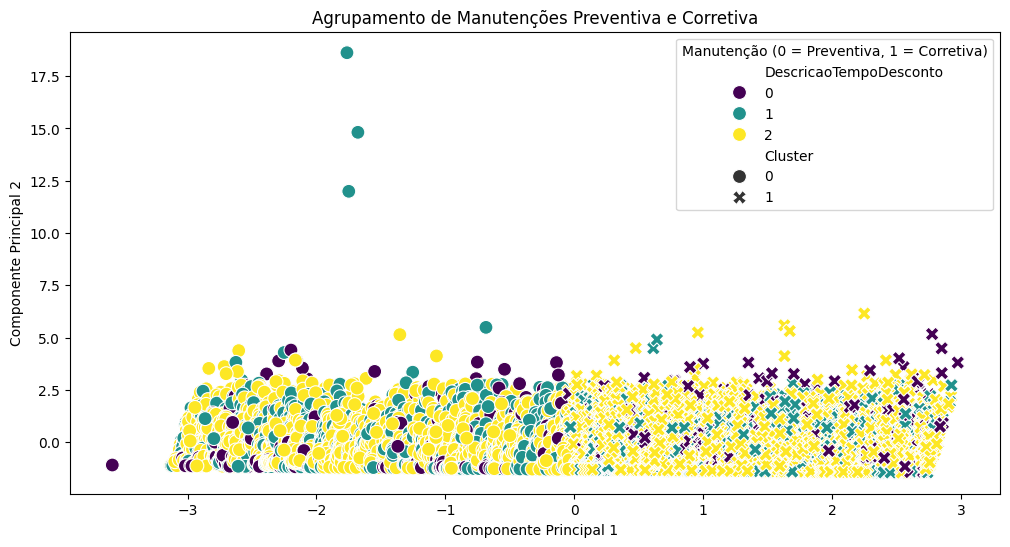

In [ ]:

# Aplica PCA para reduzir para 2 dimensões
pca = PCA(n_components=2)
df_cluster_pca = pca.fit_transform(df_cluster[features])

# Adiciona os componentes principais ao DataFrame
df_cluster['PCA1'] = df_cluster_pca[:, 0]
df_cluster['PCA2'] = df_cluster_pca[:, 1]

# Configura o gráfico
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='DescricaoTempoDesconto',
    style='Cluster',
    palette='viridis',
    data=df_cluster,
    s=100
)

# Personalização do gráfico
plt.title('Agrupamento de Manutenções Preventiva e Corretiva')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Manutenção (0 = Preventiva, 1 = Corretiva)')
plt.show()


In [ ]:
X = df_cluster_pca

import pymc as pm
import pytensor.tensor as at

with pm.Model() as model:
  w = pm.Dirichlet("w",[1/3,1/3,1/3])
  c1 = pm.Normal("c1",0,1,shape=2)
  c2 = pm.Normal("c2",0,1,shape=2)
  c3 = pm.Normal("c3",0,1,shape=2)

  sigma0 = pm.HalfNormal('sigma0', 1, shape=X.shape[1])
  sigma1 = pm.HalfNormal('sigma1', 1, shape=X.shape[1])
  sigma2 = pm.HalfNormal('sigma2', 1, shape=X.shape[1])

  covs0 = at.diag(sigma0)
  covs1 = at.diag(sigma1)
  covs2 = at.diag(sigma2)

  components = [pm.MvNormal.dist(c1, covs0)
               ,pm.MvNormal.dist(c2, covs1)
               ,pm.MvNormal.dist(c3, covs2)]
  pm.Mixture("g",w,components,observed=X)

In [ ]:
with model:
    trace = pm.fit()
    trace_sample = trace.sample()
pm.summary(trace_sample)

Output()

Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
c1[0],-0.030,0.349,-0.662,0.642,0.017,0.012,425.0,515.0,NaN
c1[1],-0.138,0.165,-0.437,0.174,0.008,0.005,471.0,438.0,NaN
c2[0],0.001,0.342,-0.555,0.727,0.016,0.011,473.0,333.0,NaN
c2[1],-0.173,0.181,-0.544,0.137,0.009,0.007,370.0,447.0,NaN
c3[0],0.083,0.384,-0.549,0.907,0.018,0.012,478.0,470.0,NaN
c3[1],0.326,0.194,-0.031,0.687,0.009,0.007,422.0,420.0,NaN
sigma0[0],3.077,0.529,2.131,4.116,0.024,0.018,479.0,421.0,NaN
sigma0[1],0.753,0.221,0.406,1.176,0.010,0.007,475.0,474.0,NaN
sigma1[0],3.046,0.560,1.974,3.980,0.027,0.019,453.0,501.0,NaN
sigma1[1],0.741,0.223,0.350,1.144,0.010,0.008,477.0,388.0,NaN


In [ ]:
with model:
    posterior_predictive = pm.sample_posterior_predictive(trace_sample,var_names=['g'])

Output()

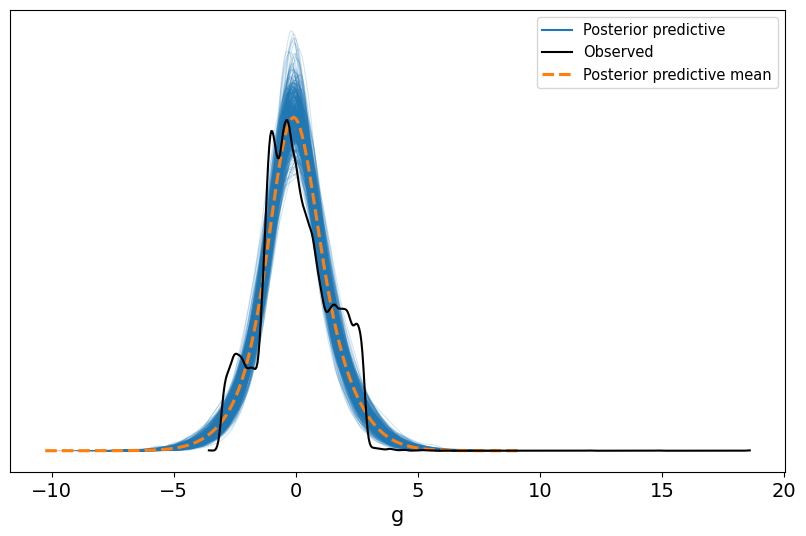

In [ ]:
import arviz as az

az.plot_ppc(posterior_predictive, mean=True, figsize=(10, 6), textsize=14)

plt.show()


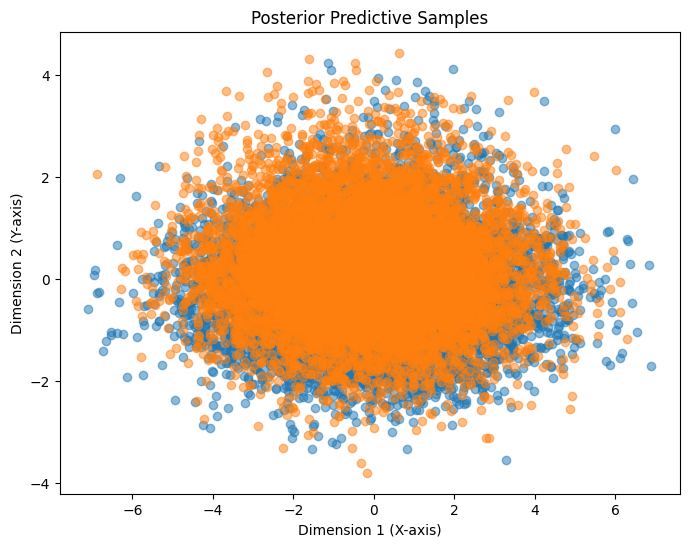

In [ ]:
posterior_predictive_samples = posterior_predictive.posterior_predictive['g']

num_samples_to_plot = 2

indices_to_plot = np.random.choice(posterior_predictive_samples.shape[1], num_samples_to_plot, replace=False)

plt.figure(figsize=(8, 6))
for idx in indices_to_plot:
    plt.scatter(posterior_predictive_samples[0, idx, :, 0],
                posterior_predictive_samples[0, idx, :, 1],
                alpha=0.5)

plt.xlabel('Dimension 1 (X-axis)')
plt.ylabel('Dimension 2 (Y-axis)')
plt.title('Posterior Predictive Samples')
plt.show()

## Modelos

In [ ]:
X = df_cluster_pca
coords_columns = ['PCA1', 'PCA2']

In [ ]:
coords = {'features': [col for col in coords_columns]}
coords

{'features': ['PCA1', 'PCA2']}

In [ ]:
X

array([[-3.00856183,  0.26604748],
       [-2.96488462,  1.59360767],
       [-2.97561223, -0.12172648],
       ...,
       [ 2.72687719, -1.27877632],
       [ 2.73991881, -0.93955133],
       [ 2.7584082 , -0.97357753]])

In [ ]:
with pm.Model(coords=coords) as model_2:
    μ0 = pm.Normal("m0",0,1,dims="features")
    μ1 = pm.Normal("m1",0,1,dims="features")

    w = pm.Dirichlet("w",[0.5,0.5])

    sigma0 = pm.HalfNormal('sigma0', 1, dims="features")
    sigma1 = pm.HalfNormal('sigma1', 1, dims="features")

    cov_sigma0 = at.diag(sigma0)

    cov_sigma1 = at.diag(sigma1)

    components = [pm.MvNormal.dist(μ0, cov_sigma0)
                 ,pm.MvNormal.dist(μ1, cov_sigma1)]
    g = pm.Mixture("g",w,components,observed=X)

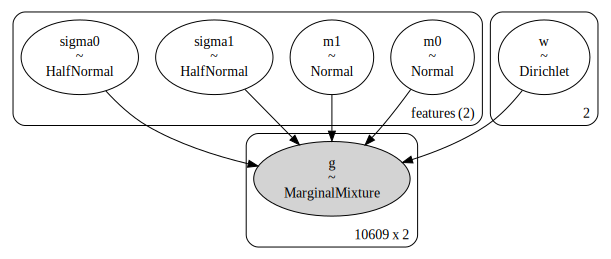

In [ ]:
pm.model_to_graphviz(model_2)

In [ ]:
with model_2:
    trace = pm.fit()
    trace_sample = trace.sample()
pm.summary(trace_sample)

Output()

Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
m0[PCA1],-0.012,0.254,-0.456,0.446,0.012,0.008,462.0,511.0,NaN
m0[PCA2],-0.124,0.146,-0.381,0.144,0.007,0.005,508.0,445.0,NaN
m1[PCA1],0.003,0.245,-0.467,0.459,0.012,0.008,419.0,514.0,NaN
m1[PCA2],0.111,0.156,-0.204,0.389,0.007,0.005,519.0,472.0,NaN
sigma0[PCA1],3.076,0.498,2.330,4.222,0.022,0.016,480.0,514.0,NaN
sigma0[PCA2],0.823,0.211,0.429,1.226,0.010,0.007,483.0,401.0,NaN
sigma1[PCA1],3.082,0.577,2.123,4.120,0.024,0.018,577.0,514.0,NaN
sigma1[PCA2],1.223,0.253,0.786,1.725,0.011,0.008,483.0,514.0,NaN
w[0],0.530,0.120,0.320,0.769,0.006,0.004,493.0,512.0,NaN
w[1],0.470,0.120,0.231,0.680,0.006,0.004,493.0,512.0,NaN


In [ ]:
with model_2:
  trace_post = pm.sample_posterior_predictive(trace_sample)

Output()

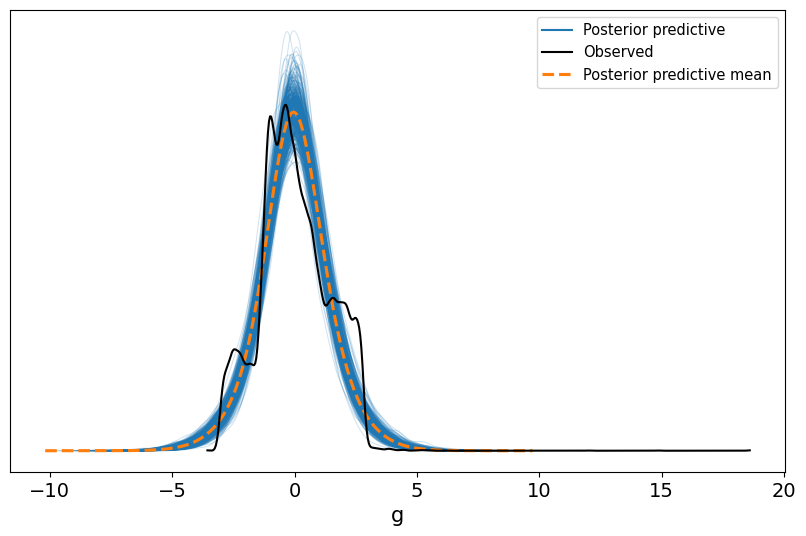

In [ ]:
az.plot_ppc(trace_post, mean=True, figsize=(10, 6), textsize=14)

plt.show()

In [ ]:
trace_post.posterior_predictive

<xarray.Dataset> Size: 85MB
Dimensions:  (chain: 1, draw: 500, g_dim_2: 10609, g_dim_3: 2)
Coordinates:
  * chain    (chain) int64 8B 0
  * draw     (draw) int64 4kB 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
  * g_dim_2  (g_dim_2) int64 85kB 0 1 2 3 4 5 ... 10604 10605 10606 10607 10608
  * g_dim_3  (g_dim_3) int64 16B 0 1
Data variables:
    g        (chain, draw, g_dim_2, g_dim_3) float64 85MB -0.4605 ... -0.2216
Attributes:
    created_at:                 2024-11-26T02:20:40.593769+00:00
    arviz_version:              0.20.0
    inference_library:          pymc
    inference_library_version:  5.18.2

In [ ]:
g_samples = trace_post.posterior_predictive["g"]

mean_predictions = g_samples.mean(dim=('chain', 'draw')).values

clusters = np.argmax(mean_predictions, axis=1)

clusters

array([1, 0, 0, ..., 1, 0, 1])

In [ ]:
X_df = pd.DataFrame(X, columns=['X', 'Y'])
X_df["Cluster"] = clusters
X_df

,X,Y,Cluster
0,-3.008562,0.266047,1
1,-2.964885,1.593608,0
2,-2.975612,-0.121726,0
3,-2.916690,2.049719,0
4,-3.127389,-1.129780,0
...,...,...,...
10604,2.763530,-0.686347,1
10605,2.736593,-1.212820,1
10606,2.726877,-1.278776,1
10607,2.739919,-0.939551,0


###Adicionando o Modelo Logistico

In [ ]:
pca_columns = ["X", "Y"]
X = X_df[pca_columns]
Y = X_df["Cluster"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

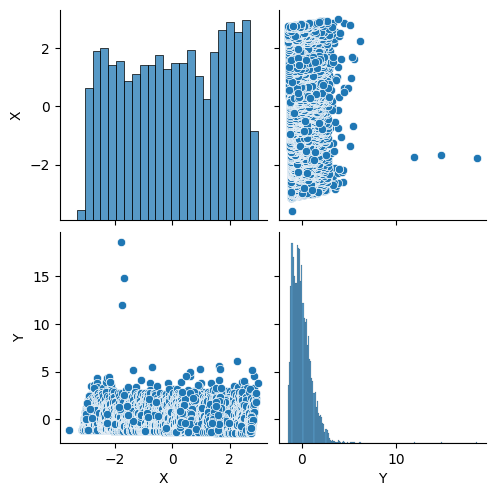

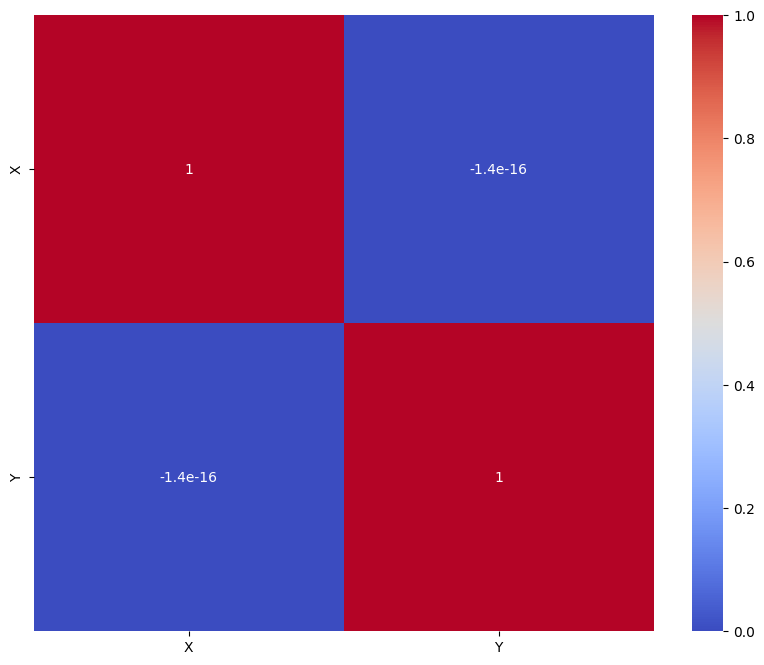

In [ ]:
sns.pairplot(X)
plt.show()

corr_matrix_filter_columns = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_filter_columns, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
import pytensor.tensor as tt
with pm.Model() as model_all:
  alpha = pm.Normal("alpha",0,1)
  betas = pm.Normal("betas",0,1, shape=2)

  Z = [
      pm.MutableData("Z_" + column, X_train[column].values)
      for column in X_train.columns if np.issubdtype(X[column].dtype, np.number)
  ]
  y = pm.MutableData("y", Y_train)

  mu = alpha + tt.dot(betas,Z)
  likelihood = pm.Bernoulli("likelihood",pm.math.invlogit(mu),observed=y)

/usr/local/lib/python3.10/dist-packages/pymc/data.py:321: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(


In [ ]:
with model_all:
  trace_model_all_priori = pm.sample_prior_predictive()

array([<Axes: xlabel='likelihood'>], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


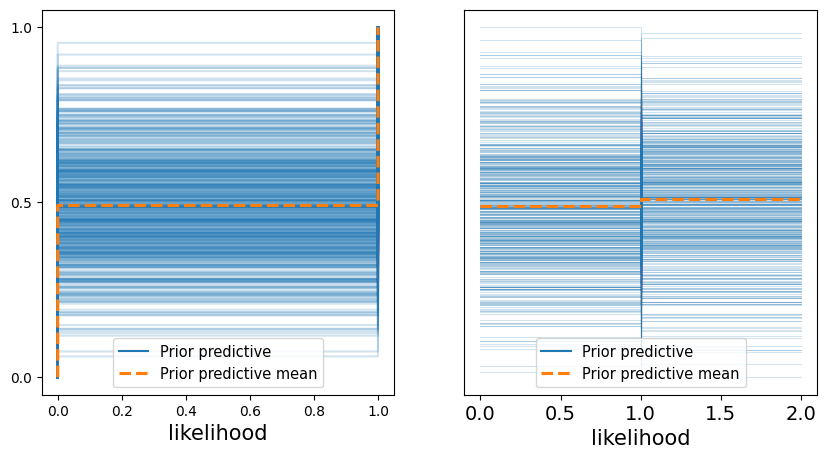

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_model_all_priori, group='prior', kind='cumulative',ax=axes[0])
az.plot_ppc(trace_model_all_priori, group='prior',ax=axes[1])

In [ ]:
with model_all:
  trace_model_all = pm.sample()

pm.summary(trace_model_all)

Output()

Output()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-0.092,0.023,-0.134,-0.047,0.0,0.000,3508.0,1797.0,1.0
betas[0],0.004,0.014,-0.023,0.028,0.0,0.000,3383.0,1790.0,1.0
betas[1],-0.006,0.023,-0.047,0.038,0.0,0.001,3005.0,1328.0,1.0


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>]], dtype=object)

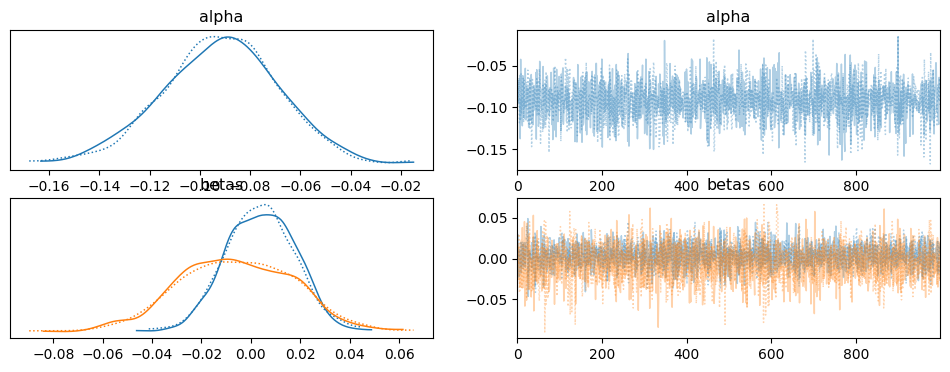

In [ ]:
az.plot_trace(trace_model_all)

In [ ]:
with model_all:
  approx = pm.fit(100)

Output()

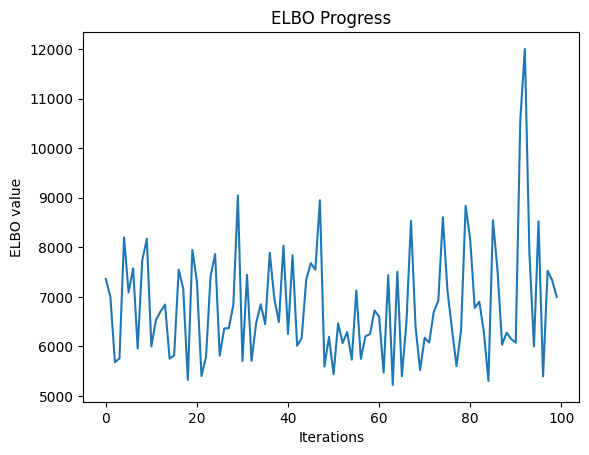

In [ ]:
plt.plot(approx.hist)
plt.title('ELBO Progress')
plt.xlabel('Iterations')
plt.ylabel('ELBO value')
plt.show()

In [ ]:
with model_all:
  trace_model_all_post = pm.sample_posterior_predictive(trace_model_all)

Output()

In [ ]:
trace_model_all_post

Inference data with groups:
	> posterior_predictive
	> observed_data
	> constant_data

array([<Axes: xlabel='likelihood'>], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


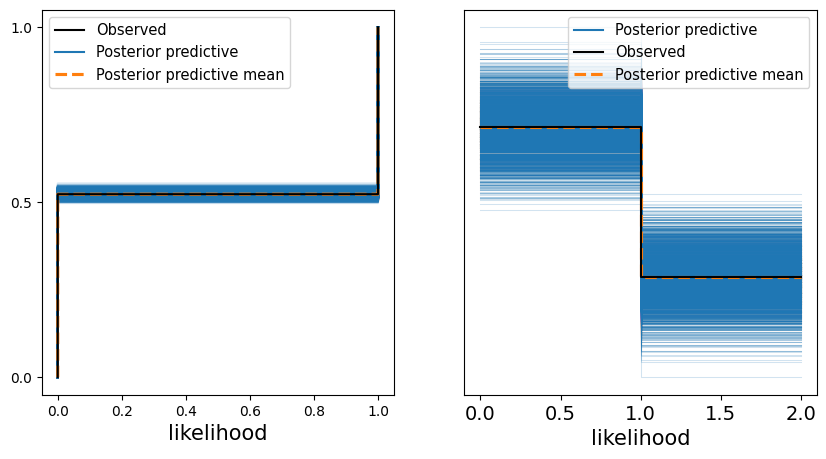

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_model_all_post, group='posterior', kind='cumulative',ax=axes[0])
az.plot_ppc(trace_model_all_post, group='posterior',ax=axes[1])

In [ ]:
with pm.Model() as model_all_test:
  alpha = pm.Normal("alpha",0,1)
  betas = pm.Normal("betas",0,1, shape=2)

  Z = [
      pm.MutableData("Z_" + column, X_test[column].values)
      for column in X_test.columns if np.issubdtype(X[column].dtype, np.number)
  ]
  y = pm.MutableData("y", Y_test)

  mu = alpha + tt.dot(betas,Z)
  likelihood = pm.Bernoulli("likelihood",pm.math.invlogit(mu),observed=y)

/usr/local/lib/python3.10/dist-packages/pymc/data.py:321: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(


In [ ]:
with model_all_test:
  trace_model_all_post_test = pm.sample_posterior_predictive(trace_model_all)

Output()

array([<Axes: xlabel='likelihood'>], dtype=object)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


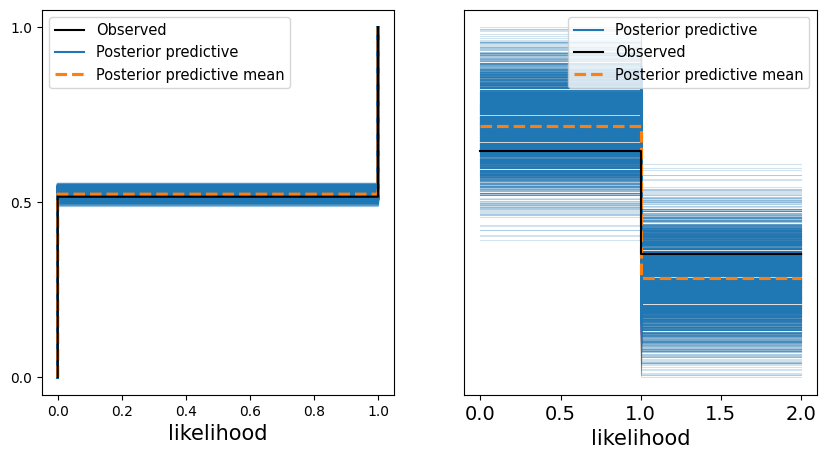

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_model_all_post_test, group='posterior', kind='cumulative',ax=axes[0])
az.plot_ppc(trace_model_all_post_test, group='posterior',ax=axes[1])

In [ ]:
mean_likelihood = trace_model_all_post_test.posterior_predictive['likelihood'].mean(dim=['chain', 'draw'])
binary_predictions = (mean_likelihood > 0.5).astype(int)

In [ ]:
abs_diff = np.abs(Y_test - binary_predictions)

df = pd.DataFrame({
    'Cluster': Y_test,
    'y_test': Y_test,
    'binary_predictions': binary_predictions,
    'abs_diff': abs_diff
})

df

,Cluster,y_test,binary_predictions,abs_diff
6531,1,1,0,1
1980,0,0,0,0
5861,0,0,0,0
8536,0,0,0,0
87,1,1,0,1
...,...,...,...,...
293,1,1,0,1
505,1,1,0,1
6449,0,0,0,0
10510,0,0,0,0


In [ ]:
errors = df["abs_diff"].sum()
acc = (len(df)-errors)/len(df)
print(f"Acuracia: {acc:.4f}")
print(f"Erros: {errors}")

Acuracia: 0.5168
Erros: 1538


In [ ]:
class1 = df["y_test"].sum()
class0 = len(df)-class1

print(f"Classe 0: {class0}")
print(f"Classe 1: {class1}")

Classe 0: 1641
Classe 1: 1542
